In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

from sklearn import metrics, preprocessing


In [2]:
!dir

 Volume in drive D has no label.
 Volume Serial Number is 3417-05D0

 Directory of D:\PythonTraining\Signate\【第1回_Beginner限定コンペ】銀行の顧客ターゲティング\-1-_Beginner-

2020/08/16  14:42    <DIR>          .
2020/08/16  14:42    <DIR>          ..
2020/08/14  07:31               238 .gitignore
2020/08/16  12:36    <DIR>          .ipynb_checkpoints
2020/08/14  08:07           224,463 20200814_001.ipynb
2020/08/15  11:55            21,817 20200814_002.ipynb
2020/08/15  12:55           519,897 20200815_001.ipynb
2020/08/15  14:12            42,626 20200815_002_tensorflow.ipynb
2020/08/15  15:12           211,220 20200815_003.ipynb
2020/08/15  15:12           216,290 20200815_004.ipynb
2020/08/16  12:12         2,992,540 20200816_001.ipynb
2020/08/16  12:36         1,489,238 20200816_002.ipynb
2020/08/16  14:42           773,397 20200816_003.ipynb
2020/08/15  14:13    <DIR>          old
2020/08/15  15:00           479,222 submit_20200813_2.csv
2020/08/14  07:57           484,815 submit_20200814_1.csv
202

In [3]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
sample = pd.read_csv('submit_sample.csv', header=None)
train.shape, test.shape, sample.shape

((27100, 17), (18050, 16), (18050, 2))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27100 entries, 0 to 27099
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        27100 non-null  int64 
 1   job        27100 non-null  object
 2   marital    27100 non-null  object
 3   education  27100 non-null  object
 4   default    27100 non-null  object
 5   balance    27100 non-null  int64 
 6   housing    27100 non-null  object
 7   loan       27100 non-null  object
 8   contact    27100 non-null  object
 9   day        27100 non-null  int64 
 10  month      27100 non-null  object
 11  duration   27100 non-null  int64 
 12  campaign   27100 non-null  int64 
 13  pdays      27100 non-null  int64 
 14  previous   27100 non-null  int64 
 15  poutcome   27100 non-null  object
 16  y          27100 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 3.7+ MB


In [5]:
test['y'] = -999

In [6]:
all_df = pd.concat([train, test], axis=0)
all_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
0,31,services,married,secondary,no,12294,yes,no,cellular,21,nov,101,3,498,0,other,0
1,29,entrepreneur,single,tertiary,no,43027,no,no,cellular,22,aug,158,2,702,0,unknown,1
2,35,management,married,tertiary,no,12252,yes,no,cellular,11,nov,351,1,826,0,failure,0
3,31,technician,married,secondary,no,99121,yes,yes,unknown,16,may,658,2,120,0,failure,0
4,48,unemployed,married,primary,no,42005,yes,no,telephone,3,apr,177,1,273,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18045,49,self-employed,married,tertiary,no,98357,yes,no,cellular,6,jul,101,2,417,0,failure,-999
18046,34,blue-collar,married,secondary,no,29621,yes,no,cellular,12,may,345,1,815,0,unknown,-999
18047,34,admin.,single,secondary,no,94260,yes,no,unknown,16,may,121,2,370,0,unknown,-999


In [7]:
cols_o = all_df.select_dtypes(include='object').columns.tolist()
cols_o

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [8]:
for col in cols_o:
    print(col, all_df[col].unique())


job ['services' 'entrepreneur' 'management' 'technician' 'unemployed'
 'blue-collar' 'admin.' 'retired' 'self-employed' 'housemaid' 'student'
 'unknown']
marital ['married' 'single' 'divorced']
education ['secondary' 'tertiary' 'primary' 'unknown']
default ['no' 'yes']
housing ['yes' 'no']
loan ['no' 'yes']
contact ['cellular' 'unknown' 'telephone']
month ['nov' 'aug' 'may' 'apr' 'sep' 'jun' 'jul' 'feb' 'oct' 'jan' 'mar']
poutcome ['other' 'unknown' 'failure' 'success']


# データ解析

In [9]:
for col in cols_o:
    le = preprocessing.LabelEncoder()
    all_df[col] = le.fit_transform(all_df[col])
    
all_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
0,31,7,1,1,0,12294,1,0,0,21,8,101,3,498,0,1,0
1,29,2,2,2,0,43027,0,0,0,22,1,158,2,702,0,3,1
2,35,4,1,2,0,12252,1,0,0,11,8,351,1,826,0,0,0
3,31,9,1,1,0,99121,1,1,2,16,7,658,2,120,0,0,0
4,48,10,1,0,0,42005,1,0,1,3,0,177,1,273,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18045,49,6,1,2,0,98357,1,0,0,6,4,101,2,417,0,0,-999
18046,34,1,1,1,0,29621,1,0,0,12,7,345,1,815,0,3,-999
18047,34,0,2,1,0,94260,1,0,2,16,7,121,2,370,0,3,-999


In [10]:
train_df = all_df[all_df['y'] != -999]

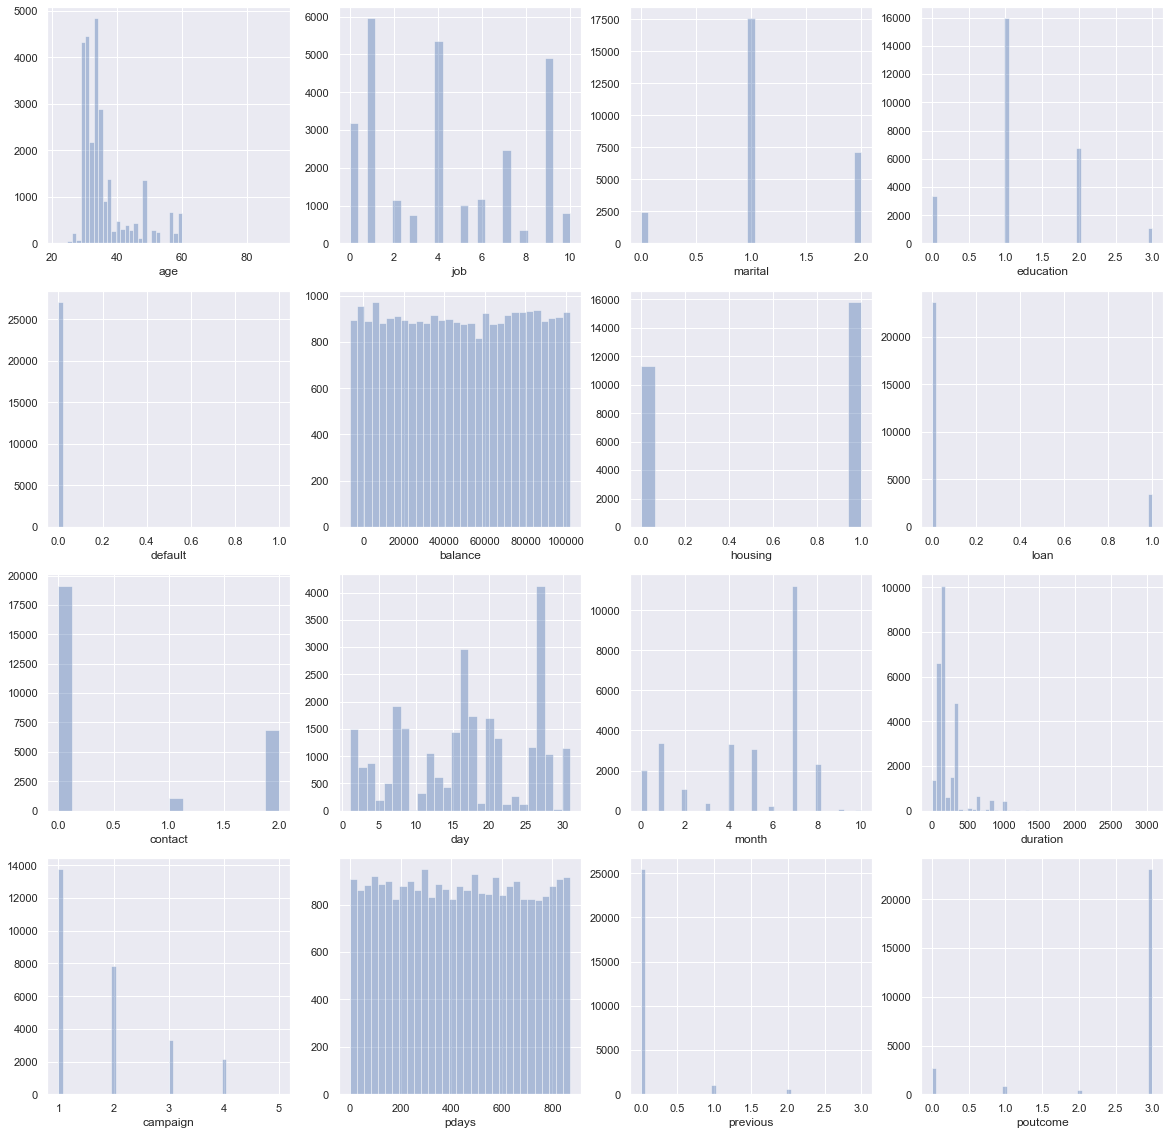

In [11]:
plt.figure(figsize=(20, 20))

for idx, col in enumerate(train_df.drop('y', axis=1).columns):
    plt.subplot(4, 4, idx+1)
    sns.distplot(train_df[col], kde=False)

plt.show()

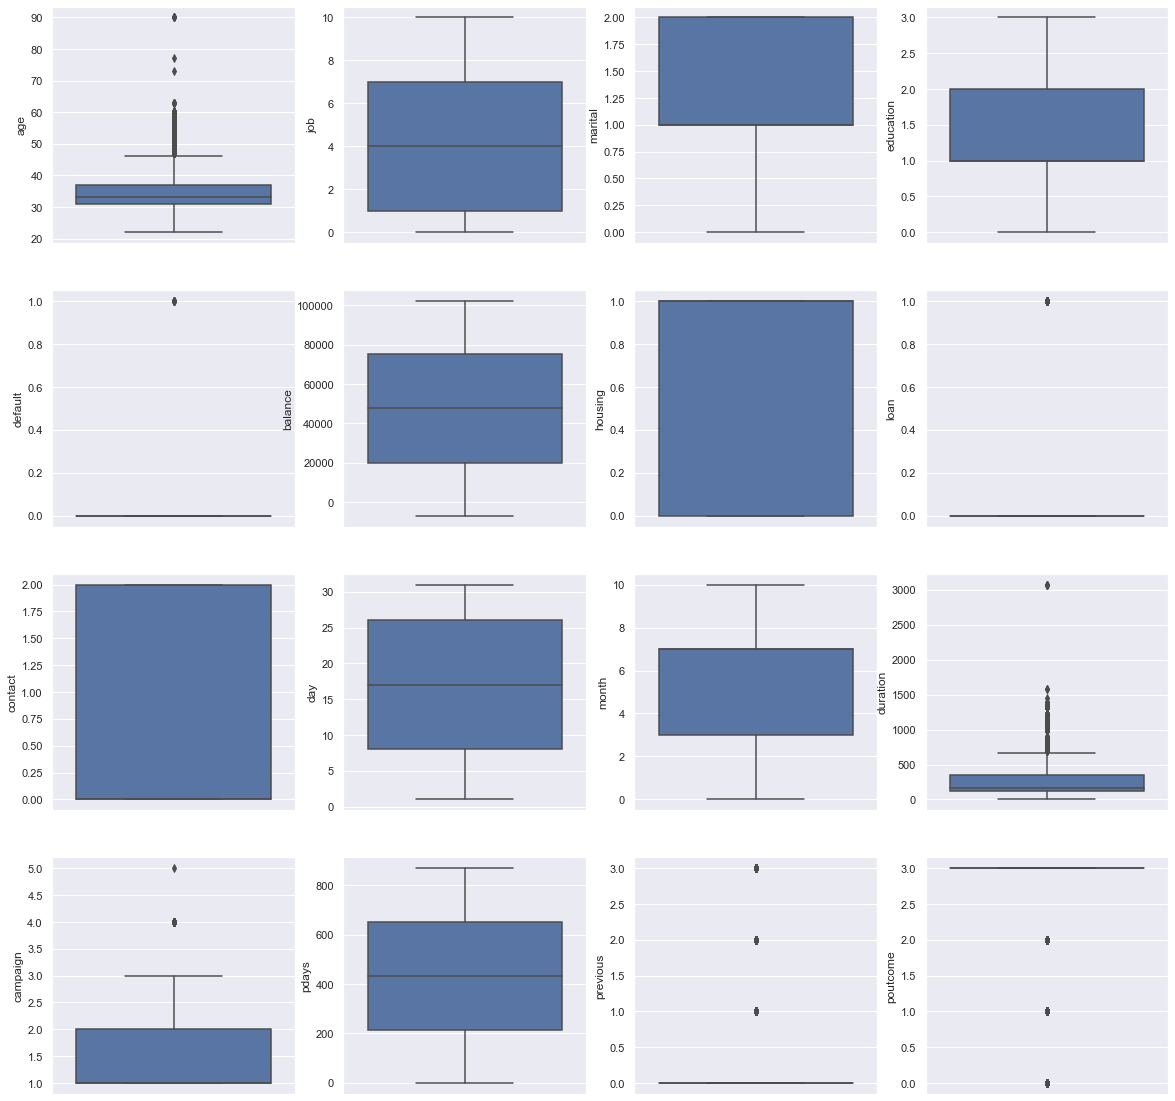

In [12]:
plt.figure(figsize=(20, 20))

for idx, col in enumerate(train_df.drop('y', axis=1).columns):
    plt.subplot(4, 4, idx+1)
    sns.boxplot(y=col, data=train_df)

plt.show()

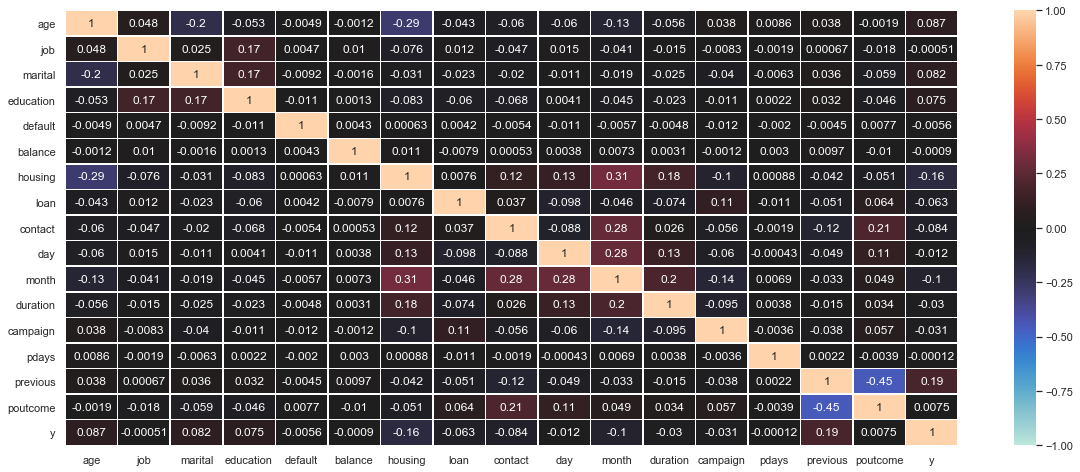

In [13]:
plt.figure(figsize=(20, 8))
sns.heatmap(train_df.corr(), annot=True, linewidths=.5, center=0, vmin=-1, vmax=1)

In [14]:
train_corr = train_df.corr()
train_corr

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,0.047606,-0.202964,-0.053150,-0.004850,-0.001185,-0.287988,-0.043499,-0.059684,-0.059669,-0.130827,-0.055642,0.037633,0.008551,0.037545,-0.001859,0.086668
job,0.047606,1.000000,0.025324,0.174368,0.004744,0.009992,-0.075545,0.011862,-0.046561,0.015200,-0.040781,-0.015030,-0.008268,-0.001878,0.000673,-0.017633,-0.000511
marital,-0.202964,0.025324,1.000000,0.171587,-0.009211,-0.001564,-0.030738,-0.022570,-0.019849,-0.011200,-0.019129,-0.024760,-0.040183,-0.006341,0.036088,-0.059460,0.081587
education,-0.053150,0.174368,0.171587,1.000000,-0.011144,0.001252,-0.082792,-0.059623,-0.068318,0.004054,-0.045285,-0.022702,-0.011074,0.002218,0.032017,-0.046109,0.075080
default,-0.004850,0.004744,-0.009211,-0.011144,1.000000,0.004279,0.000634,0.004193,-0.005450,-0.011317,-0.005664,-0.004793,-0.011645,-0.002003,-0.004501,0.007678,-0.005586
balance,-0.001185,0.009992,-0.001564,0.001252,0.004279,1.000000,0.010994,-0.007877,0.000528,0.003816,0.007300,0.003144,-0.001229,0.003018,0.009717,-0.010312,-0.000899
housing,-0.287988,-0.075545,-0.030738,-0.082792,0.000634,0.010994,1.000000,0.007575,0.116319,0.128413,0.313566,0.178890,-0.102108,0.000877,-0.041737,-0.050514,-0.164710
loan,-0.043499,0.011862,-0.022570,-0.059623,0.004193,-0.007877,0.007575,1.000000,0.036504,-0.097799,-0.046102,-0.074189,0.107007,-0.010835,-0.051035,0.064142,-0.062696
contact,-0.059684,-0.046561,-0.019849,-0.068318,-0.005450,0.000528,0.116319,0.036504,1.000000,-0.087920,0.276526,0.026485,-0.055753,-0.001864,-0.121987,0.208759,-0.083513
day,-0.059669,0.015200,-0.011200,0.004054,-0.011317,0.003816,0.128413,-0.097799,-0.087920,1.000000,0.284747,0.134440,-0.060326,-0.000433,-0.048624,0.110260,-0.011804


In [15]:
train_corr.drop('y', axis=0).index

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [16]:
train_corr.drop('y', axis=1).columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [17]:
# for row in train_corr.drop('y', axis=0).index:
#     for col in train_corr.drop('y', axis=1).columns:
#         if row != col:
#             if abs(train_corr.loc[col, row]) > 0.1:
#                 print(col, '/' , row, ':', train_corr.loc[col, row])
#                 plt.figure(figsize=(20, 4))
#                 sns.violinplot(data=train_df, y=col, x=row, hue='y', split=True)
#                 plt.show()


In [18]:
all_df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000
mean,36.085670,4.273068,1.172270,1.200377,0.000310,47473.237940,0.581107,0.127796,0.551849,16.754109,4.980532,229.321240,1.773533,433.957342,0.087774,2.623765,-399.331960
std,7.835323,3.286885,0.568505,0.696402,0.017606,31579.127347,0.493383,0.333866,0.870418,8.570106,2.623468,206.488239,0.947974,251.851537,0.369888,0.944938,489.406473
min,20.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,-999.000000
25%,31.000000,1.000000,1.000000,1.000000,0.000000,19890.500000,0.000000,0.000000,0.000000,8.000000,3.000000,121.000000,1.000000,216.000000,0.000000,3.000000,-999.000000
50%,33.000000,4.000000,1.000000,1.000000,0.000000,47360.500000,1.000000,0.000000,0.000000,17.000000,7.000000,158.000000,1.000000,434.000000,0.000000,3.000000,0.000000
75%,37.000000,7.000000,2.000000,2.000000,0.000000,74916.500000,1.000000,0.000000,2.000000,26.000000,7.000000,345.000000,2.000000,652.000000,0.000000,3.000000,0.000000
max,90.000000,11.000000,2.000000,3.000000,1.000000,102124.000000,1.000000,1.000000,2.000000,31.000000,10.000000,3076.000000,5.000000,870.000000,3.000000,3.000000,1.000000


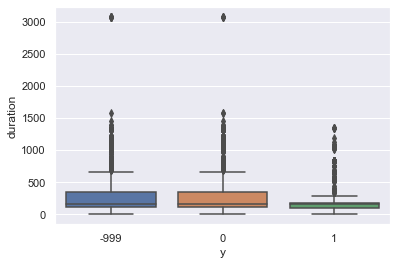

In [19]:
sns.boxplot(data=all_df, y='duration', x='y')

In [20]:
all_df[all_df['duration'] > 1000]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
40,31,0,1,1,0,3245,1,0,0,21,8,1074,1,164,0,3,0
230,32,7,1,1,0,71124,1,0,0,27,7,1045,2,245,0,3,0
309,31,1,1,1,0,94722,1,0,0,27,7,1045,1,624,0,3,0
353,34,9,1,1,0,69914,1,0,0,27,7,1045,2,572,0,3,0
429,31,1,0,1,0,17701,1,0,1,19,8,1220,2,744,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17662,34,4,2,2,0,83977,1,0,0,27,7,1045,2,745,0,3,-999
17752,34,4,1,1,0,42246,1,0,0,27,7,1045,1,708,0,3,-999
17778,53,7,1,0,0,83837,0,0,0,17,1,1027,2,390,0,3,-999


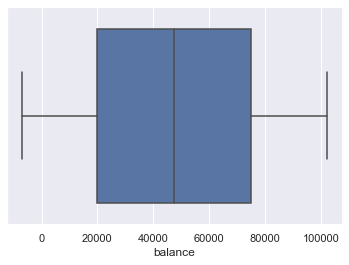

In [21]:
sns.boxplot(all_df['balance'])

# データ加工

In [22]:
all_df['balance'] = all_df['balance'].apply(lambda x: x if x > 0 else 0)
all_df['pdays'] = all_df['pdays'].apply(lambda x: x if x > 0 else 0)
all_df[all_df['duration'] > 1000]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
40,31,0,1,1,0,3245,1,0,0,21,8,1074,1,164,0,3,0
230,32,7,1,1,0,71124,1,0,0,27,7,1045,2,245,0,3,0
309,31,1,1,1,0,94722,1,0,0,27,7,1045,1,624,0,3,0
353,34,9,1,1,0,69914,1,0,0,27,7,1045,2,572,0,3,0
429,31,1,0,1,0,17701,1,0,1,19,8,1220,2,744,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17662,34,4,2,2,0,83977,1,0,0,27,7,1045,2,745,0,3,-999
17752,34,4,1,1,0,42246,1,0,0,27,7,1045,1,708,0,3,-999
17778,53,7,1,0,0,83837,0,0,0,17,1,1027,2,390,0,3,-999


In [23]:
all_df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000
mean,36.085670,4.273068,1.172270,1.200377,0.000310,47691.797231,0.581107,0.127796,0.551849,16.754109,4.980532,229.321240,1.773533,433.958494,0.087774,2.623765,-399.331960
std,7.835323,3.286885,0.568505,0.696402,0.017606,31232.236213,0.493383,0.333866,0.870418,8.570106,2.623468,206.488239,0.947974,251.849550,0.369888,0.944938,489.406473
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-999.000000
25%,31.000000,1.000000,1.000000,1.000000,0.000000,19890.500000,0.000000,0.000000,0.000000,8.000000,3.000000,121.000000,1.000000,216.000000,0.000000,3.000000,-999.000000
50%,33.000000,4.000000,1.000000,1.000000,0.000000,47360.500000,1.000000,0.000000,0.000000,17.000000,7.000000,158.000000,1.000000,434.000000,0.000000,3.000000,0.000000
75%,37.000000,7.000000,2.000000,2.000000,0.000000,74916.500000,1.000000,0.000000,2.000000,26.000000,7.000000,345.000000,2.000000,652.000000,0.000000,3.000000,0.000000
max,90.000000,11.000000,2.000000,3.000000,1.000000,102124.000000,1.000000,1.000000,2.000000,31.000000,10.000000,3076.000000,5.000000,870.000000,3.000000,3.000000,1.000000


# トレーニング

In [24]:
X = all_df[all_df['y'] != -999].drop('y', axis=1)
y = all_df[all_df['y'] != -999]['y']
X_Test = all_df[all_df['y'] == -999].drop('y', axis=1)

pred_list = {}

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


In [26]:
parameters = {
    'max_depth': list(range(-1, 11)),
}

## LightGBM

In [27]:
lgb = LGBMClassifier()

gcv = GridSearchCV(lgb, parameters, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv.fit(X, y)


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'max_depth': [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='roc_auc')

In [28]:
gcv.best_params_
# {'max_depth': 4}

{'max_depth': 4}

In [29]:
train_score = gcv.cv_results_['mean_train_score']
test_score = gcv.cv_results_['mean_test_score']
print(train_score)
print(test_score)

[0.95572973 0.95572973 0.80811267 0.84324729 0.86887388 0.8946493
 0.9235879  0.93853826 0.94443381 0.94856839 0.95064673 0.95240244]
[0.84443483 0.84443483 0.80405521 0.83168072 0.84308331 0.84832249
 0.84787825 0.8458119  0.84684092 0.84470876 0.84604851 0.84471611]


([<matplotlib.axis.XTick at 0x1a594ac1e48>,
 <a list of 12 Text xticklabel objects>)

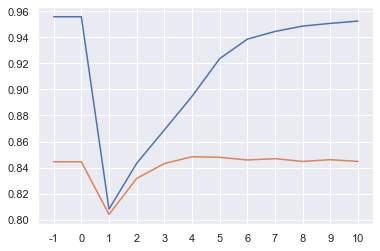

In [30]:
plt.plot(train_score)
plt.plot(test_score)
plt.xticks(list(range(len(gcv.cv_results_['params']))), [x['max_depth'] for x in gcv.cv_results_['params']])

gcv.best_params_: {'learning_rate': 0.05}


([<matplotlib.axis.XTick at 0x1a594b93bc8>,
 <a list of 8 Text xticklabel objects>)

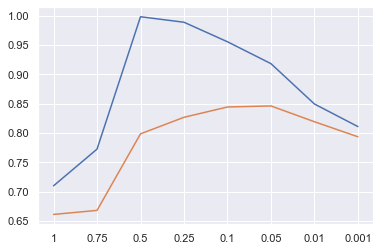

In [31]:
parameters_lgb = {
    'learning_rate': [1, 0.75, 0.5, 0.25, 0.1, 0.05, 0.01, 0.001],
}

lgb = LGBMClassifier()

gcv = GridSearchCV(lgb, parameters_lgb, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv.fit(X, y)
print('gcv.best_params_:', gcv.best_params_)
train_score = gcv.cv_results_['mean_train_score']
test_score = gcv.cv_results_['mean_test_score']
plt.plot(train_score)
plt.plot(test_score)
plt.xticks(list(range(len(gcv.cv_results_['params']))), [x['learning_rate'] for x in gcv.cv_results_['params']])

gcv.best_params_: {'num_leaves': 15}


([<matplotlib.axis.XTick at 0x1a594c00ac8>,
 <a list of 20 Text xticklabel objects>)

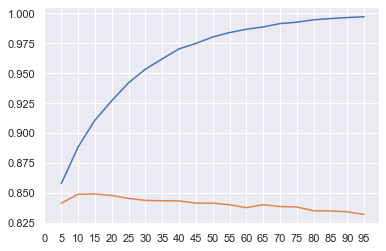

In [32]:
parameters_lgb = {
    'num_leaves': list(range(0, 100, 5)),
}

lgb = LGBMClassifier()

gcv = GridSearchCV(lgb, parameters_lgb, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv.fit(X, y)
print('gcv.best_params_:', gcv.best_params_)
train_score = gcv.cv_results_['mean_train_score']
test_score = gcv.cv_results_['mean_test_score']
plt.plot(train_score)
plt.plot(test_score)
plt.xticks(list(range(len(gcv.cv_results_['params']))), [x['num_leaves'] for x in gcv.cv_results_['params']])

gcv.best_params_: {'feature_fraction': 0.2}


([<matplotlib.axis.XTick at 0x1a594c9d3c8>,
 <a list of 7 Text xticklabel objects>)

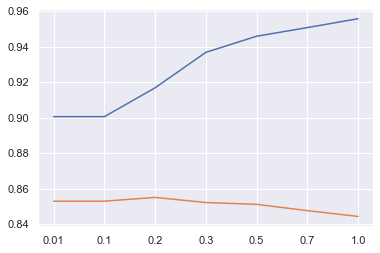

In [33]:
parameters_lgb = {
    'feature_fraction': [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 1.0],
}

lgb = LGBMClassifier()

gcv = GridSearchCV(lgb, parameters_lgb, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv.fit(X, y)
print('gcv.best_params_:', gcv.best_params_)
train_score = gcv.cv_results_['mean_train_score']
test_score = gcv.cv_results_['mean_test_score']
plt.plot(train_score)
plt.plot(test_score)
plt.xticks(list(range(len(gcv.cv_results_['params']))), [x['feature_fraction'] for x in gcv.cv_results_['params']])

gcv.best_params_: {'n_estimators': 75}


([<matplotlib.axis.XTick at 0x1a594cee0c8>,
 <a list of 12 Text xticklabel objects>)

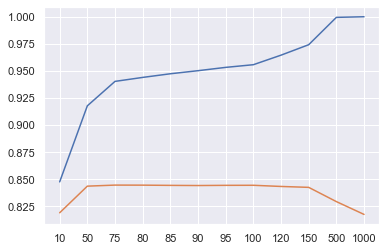

In [34]:
parameters_lgb = {
    'n_estimators': [10, 50, 75, 80, 85, 90, 95, 100, 120, 150, 500, 1000],
}

lgb = LGBMClassifier()

gcv = GridSearchCV(lgb, parameters_lgb, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv.fit(X, y)
print('gcv.best_params_:', gcv.best_params_)
train_score = gcv.cv_results_['mean_train_score']
test_score = gcv.cv_results_['mean_test_score']
plt.plot(train_score)
plt.plot(test_score)
plt.xticks(list(range(len(gcv.cv_results_['params']))), [x['n_estimators'] for x in gcv.cv_results_['params']])

gcv.best_params_: {'min_data_in_leaf': 400}


([<matplotlib.axis.XTick at 0x1a594cdb808>,
 <a list of 8 Text xticklabel objects>)

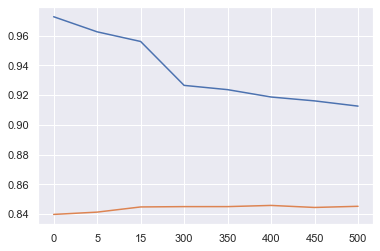

In [35]:
parameters_lgb = {
    'min_data_in_leaf': [0, 5, 15, 300, 350, 400, 450, 500],
}

lgb = LGBMClassifier()

gcv = GridSearchCV(lgb, parameters_lgb, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv.fit(X, y)
print('gcv.best_params_:', gcv.best_params_)
train_score = gcv.cv_results_['mean_train_score']
test_score = gcv.cv_results_['mean_test_score']
plt.plot(train_score)
plt.plot(test_score)
plt.xticks(list(range(len(gcv.cv_results_['params']))), [x['min_data_in_leaf'] for x in gcv.cv_results_['params']])

In [36]:
lgb = LGBMClassifier(
    max_depth=4,
    learning_rate=0.05,
    num_leaves=15,
    feature_fraction=0.2,
    random_state=0,
    n_estimators=75,
    min_data_in_leaf=400,
    n_jobs=-1)
# {'max_depth': 4}
# {'learning_rate': 0.05}
# {'num_leaves': 15}
# {'feature_fraction': 0.2}
# {'n_estimators': 75}
# {'min_data_in_leaf': 400}

lgb.fit(X, y)


LGBMClassifier(feature_fraction=0.2, learning_rate=0.05, max_depth=4,
               min_data_in_leaf=400, n_estimators=75, num_leaves=15,
               random_state=0)

In [37]:
y_pred = lgb.predict_proba(X)[:,1]
y_pred

array([0.03838973, 0.14935987, 0.02277297, ..., 0.10463984, 0.04941202,
       0.01777891])

In [38]:
pred_list['lgb'] = y_pred

## XGBoost

In [39]:
xgb = XGBClassifier()

gcv2 = GridSearchCV(xgb, parameters, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv2.fit(X, y)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [40]:
gcv2.best_params_
# {'max_depth': 3}

{'max_depth': 3}

In [41]:
train_score = gcv2.cv_results_['mean_train_score']
test_score = gcv2.cv_results_['mean_test_score']
print(train_score)
print(test_score)

[       nan 0.5        0.82881    0.87058431 0.90047356 0.93552231
 0.96734298 0.98811787 0.99715248 0.99964869 0.99997903 0.99999858]
[       nan 0.5        0.82377643 0.848421   0.85134146 0.84661132
 0.83843675 0.82870986 0.82461772 0.82173459 0.81934644 0.81569948]


([<matplotlib.axis.XTick at 0x1a594dd3c08>,
 <a list of 12 Text xticklabel objects>)

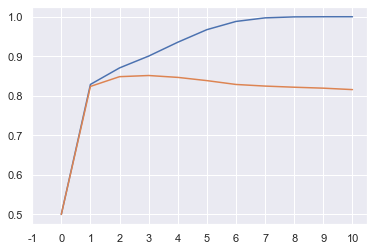

In [42]:
plt.plot(train_score)
plt.plot(test_score)
plt.xticks(list(range(len(gcv2.cv_results_['params']))), [x['max_depth'] for x in gcv2.cv_results_['params']])

gcv2.best_params_: {'colsample_bytree': 0.01}


([<matplotlib.axis.XTick at 0x1a594e670c8>,
 <a list of 8 Text xticklabel objects>)

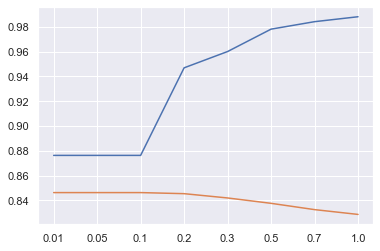

In [43]:
parameters_xgb = {
    'colsample_bytree': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 1.0],
}

xgb = XGBClassifier()

gcv2 = GridSearchCV(xgb, parameters_xgb, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv2.fit(X, y)
print('gcv2.best_params_:', gcv2.best_params_)
train_score = gcv2.cv_results_['mean_train_score']
test_score = gcv2.cv_results_['mean_test_score']
plt.plot(train_score)
plt.plot(test_score)
plt.xticks(list(range(len(gcv2.cv_results_['params']))), [x['colsample_bytree'] for x in gcv2.cv_results_['params']])

gcv2.best_params_: {'eta': 5}


([<matplotlib.axis.XTick at 0x1a594fff908>,
 <a list of 14 Text xticklabel objects>)

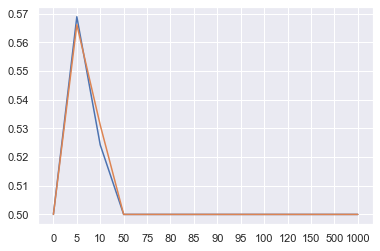

In [44]:
parameters_xgb = {
    'eta': [0, 5, 10, 50, 75, 80, 85, 90, 95, 100, 120, 150, 500, 1000],
}

xgb = XGBClassifier()

gcv2 = GridSearchCV(xgb, parameters_xgb, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv2.fit(X, y)
print('gcv2.best_params_:', gcv2.best_params_)
train_score = gcv2.cv_results_['mean_train_score']
test_score = gcv2.cv_results_['mean_test_score']
plt.plot(train_score)
plt.plot(test_score)
plt.xticks(list(range(len(gcv2.cv_results_['params']))), [x['eta'] for x in gcv2.cv_results_['params']])

gcv2.best_params_: {'min_child_weight': 50}


([<matplotlib.axis.XTick at 0x1a5950748c8>,
 <a list of 8 Text xticklabel objects>)

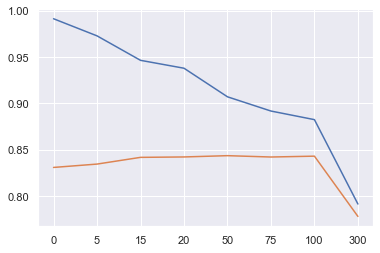

In [45]:
parameters_xgb = {
    'min_child_weight': [0, 5, 15, 20, 50, 75, 100, 300],
}

xgb = XGBClassifier()

gcv2 = GridSearchCV(xgb, parameters_xgb, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv2.fit(X, y)
print('gcv2.best_params_:', gcv2.best_params_)
train_score = gcv2.cv_results_['mean_train_score']
test_score = gcv2.cv_results_['mean_test_score']
plt.plot(train_score)
plt.plot(test_score)
plt.xticks(list(range(len(gcv2.cv_results_['params']))), [x['min_child_weight'] for x in gcv2.cv_results_['params']])

gcv2.best_params_: {'subsample': 1}


([<matplotlib.axis.XTick at 0x1a5950caa88>,
 <a list of 5 Text xticklabel objects>)

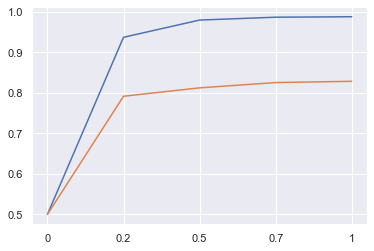

In [46]:
parameters_xgb = {
    'subsample': [0, 0.2, 0.5, 0.7, 1],
}

xgb = XGBClassifier()

gcv2 = GridSearchCV(xgb, parameters_xgb, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv2.fit(X, y)
print('gcv2.best_params_:', gcv2.best_params_)
train_score = gcv2.cv_results_['mean_train_score']
test_score = gcv2.cv_results_['mean_test_score']
plt.plot(train_score)
plt.plot(test_score)
plt.xticks(list(range(len(gcv2.cv_results_['params']))), [x['subsample'] for x in gcv2.cv_results_['params']])

In [57]:
xgb = XGBClassifier(
    max_depth=3,
    colsample_bytree=0.01,
#     eta=5,
    min_child_weight=50,
    subsample=1,
    n_jobs=-1)
# {'max_depth': 3}
# {'colsample_bytree': 0.01}
# {'eta': 5}
# {'min_child_weight': 50}
# {'subsample': 1}

xgb.fit(X, y)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.01, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=50, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
y_pred2 = xgb.predict_proba(X)[:,1]
y_pred2

array([0.0167825 , 0.18324246, 0.00918119, ..., 0.08262949, 0.0591043 ,
       0.0080656 ], dtype=float32)

In [59]:
pred_list['xgb'] = y_pred2

In [60]:
y_pred2.shape, y.shape

((27100,), (27100,))

## Random Forest

In [61]:
pred_list = pd.DataFrame(pred_list)

In [62]:
rf = RandomForestClassifier()

gcv3 = GridSearchCV(rf, parameters, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv3.fit(pred_list, y)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='roc_auc')

In [63]:
gcv3.best_params_
# {'max_depth': 4}

{'max_depth': 4}

In [64]:
train_score = gcv3.cv_results_['mean_train_score']
test_score = gcv3.cv_results_['mean_test_score']
print(train_score)
print(test_score)

[       nan        nan 0.73924995 0.83674311 0.84677771 0.85151783
 0.86009044 0.8719838  0.88524345 0.89992867 0.91579829 0.93288157]
[       nan        nan 0.73558094 0.83406882 0.84361251 0.84498632
 0.84476155 0.84397413 0.84281664 0.84225493 0.84119208 0.83993842]


([<matplotlib.axis.XTick at 0x1a5950f6708>,
 <a list of 12 Text xticklabel objects>)

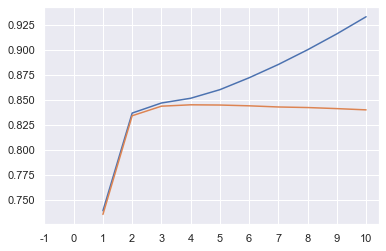

In [65]:
plt.plot(train_score)
plt.plot(test_score)
plt.xticks(list(range(len(gcv3.cv_results_['params']))), [x['max_depth'] for x in gcv3.cv_results_['params']])

gc32.best_params_: {'min_samples_leaf': 500}


([<matplotlib.axis.XTick at 0x1a5951b9488>,
 <a list of 12 Text xticklabel objects>)

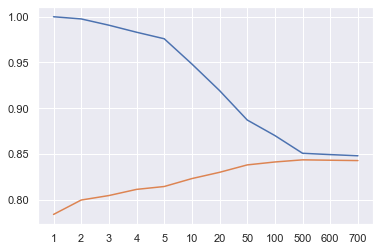

In [66]:
parameters_rf = {
    "min_samples_leaf": [1, 2, 3, 4, 5, 10, 20, 50, 100, 500, 600, 700], 
}

rf = RandomForestClassifier()

gcv3 = GridSearchCV(rf, parameters_rf, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv3.fit(pred_list, y)
print('gc32.best_params_:', gcv3.best_params_)
train_score = gcv3.cv_results_['mean_train_score']
test_score = gcv3.cv_results_['mean_test_score']
plt.plot(train_score)
plt.plot(test_score)
plt.xticks(list(range(len(gcv3.cv_results_['params']))), [x['min_samples_leaf'] for x in gcv3.cv_results_['params']])

In [72]:
rf = RandomForestClassifier(
    max_depth=4,
    min_samples_leaf=500,
)
# {'max_depth': 4}
# {'min_samples_leaf': 500}

rf.fit(pred_list, y)


RandomForestClassifier(max_depth=4, min_samples_leaf=500)

In [73]:
y_pred3 = rf.predict_proba(pred_list)[:,1]
y_pred3

array([0.01232943, 0.2132016 , 0.00474208, ..., 0.08935123, 0.03174014,
       0.00459766])

## 結果確認

In [74]:
roc_auc_score(y, pred_list['lgb'])


0.838144714766118

In [75]:
roc_auc_score(y, pred_list['xgb'])


0.8445718622969329

In [76]:
roc_auc_score(y, y_pred3)


0.8471482789011453

# 予測

In [77]:
pred_list_test = {}

In [78]:
pred_list_test['lgb'] = lgb.predict_proba(X_Test)[:, 1]

In [79]:
pred_list_test['xgb'] = xgb.predict_proba(X_Test)[:, 1]

In [80]:
pred_list_test = pd.DataFrame(pred_list_test)
pred_list_test

,lgb,xgb
0,0.492095,0.552311
1,0.083370,0.136275
2,0.056255,0.045604
3,0.016429,0.005892
4,0.073198,0.073816
...,...,...
18045,0.057735,0.036534
18046,0.023832,0.012155
18047,0.058129,0.040434
18048,0.019791,0.005380


In [81]:
final_pred = rf.predict_proba(pred_list_test)[:, 1]

# 結果を格納

In [82]:
sample

,0,1
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
18045,18045,0
18046,18046,0
18047,18047,0
18048,18048,0


In [83]:
sample[1] = final_pred

In [84]:
sample.to_csv('submit_20200816_3.csv', header=None, index=None)